### Note for question3
- Please follow the template to complete q3
- You may create new cells to report your results and observations

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## P1. Load data and plot
### TODO
- load q3_data.csv
- plot the points of different labels with different color

Text(0.5, 0, 'x1')

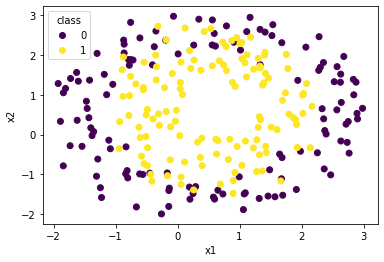

In [2]:
# Load dataset
data = pd.read_csv("q3_data.csv", header = None)
y = np.array(data[2].astype(int))
# Plot points
plot = plt.scatter(data[0], data[1], c = y)
plt.legend(handles = plot.legend_elements()[0], labels = [0,1], title = "class")
plt.ylabel('x2')
plt.xlabel('x1')

## P2. Feature mapping
### TODO
- implement function **map_feature()** to transform data from original space to the 28D space specified in the write-up

In [3]:
# Transform points to 28D space
def map_feature(data):
    x1 = np.array(data[0])
    x2 = np.array(data[1])
    return np.array([x1*0 +1 , x1, x2, x1**2 , x1*x2, x2**2 , x1**3,
                     x1**2 * x2 , x1*x2**2 , x2**3, x1**4, x1**3 * x2,
                     x1**2 * x2 **2,x1 * x2 **3,x2 **4, x1**5, x1**4 * x2,
                     x1**3 * x2 **2,x1**2 * x2 **3,x1 * x2 **4, x2 **5, 
                     x1**6, x1**5 * x2**1,x1**4 * x2**2,x1**3 * x2**3, 
                     x1**2 * x2**4, x1**1 * x2**5,  x2**6])
   
feature_mapping = map_feature([data[0], data[1]])

## P3. Regularized Logistic Regression
### TODO
- implement function **logistic_regpression_regularized()** as required in the write-up
- draw the decision boundary

### Hints
- recycling code from HW2 is allowed
- you may use functions defined this section for part 4 below
- although optional for the report, plotting the convergence curve will be helpful

Lambda: 1 Weights [[ 1.05729526]
 [ 0.16204655]
 [ 0.26984668]
 [ 0.15784554]
 [-0.14896965]
 [ 0.25385408]
 [ 0.27565389]
 [ 0.18895441]
 [ 0.10681437]
 [ 0.10799886]
 [-0.09834135]
 [ 0.0589715 ]
 [-0.00956618]
 [-0.04051705]
 [-0.36657207]
 [ 0.41416441]
 [ 0.16261339]
 [ 0.12956978]
 [ 0.04589712]
 [ 0.17802265]
 [ 0.13711344]
 [-0.21389026]
 [-0.02530485]
 [-0.2587769 ]
 [ 0.05417648]
 [-0.08400874]
 [-0.06082876]
 [-0.01638283]]


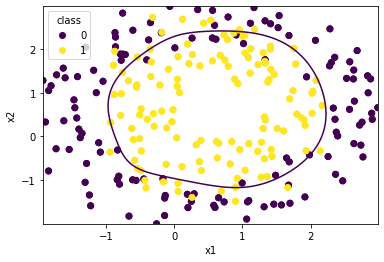

In [4]:
# Define your functions here
def sigmoid(x): 
    return 1 / (1 + np.exp(-x))

def calculate_gradients(X, y, y_pred):
    return np.dot(X, y_pred - y.reshape(len(y_pred), 1)) / X.shape[0]

def update_weights(prev_weights, current_grads, lr):
    return prev_weights - lr * current_grads

def main(X, Y, w, l, learning_rate = 0.00005, num_steps = 50000):
    n = 28
    for i in range(num_steps):
        y_pred = sigmoid(np.dot(X.transpose(), w))
        current_grad = calculate_gradients(X, Y, y_pred)
        w = update_weights(w, current_grad + (l * w) / n, learning_rate)
    return w

def predict(weights, X, Y, l):
    new_Y = sigmoid(X.transpose() @ main(X, Y, weights, l)) 
    return new_Y, main(X, Y, weights, l)

def logistic_regression_regularized(df , l):
    X = map_feature([df[0],df[1]])
    Y = np.array(df[2])
    init_weights = np.zeros((28,1))
    new_Y, w = predict(init_weights, X, Y,l)
    return new_Y, w

   
_, weights = logistic_regression_regularized(data,1)
print("Lambda: 1 Weights", weights)


# Plot decision boundary
def plot(Y):
    label = np.array(data[2].astype(int))
    plt.scatter(data[0],data[1],c=label)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.legend(handles = plt.scatter(data[0],data[1],c=label).legend_elements()[0], labels = [0,1], title = "class",loc = "upper left")

    x_min = data[0].min()
    x_max = data[0].max()
    y_min = data[1].min()
    y_max = data[1].max()
    x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max,500), np.linspace(y_min, y_max,500))
    xx = x_grid.ravel()
    yy = y_grid.ravel()

    p = np.dot(Y[1].transpose(),map_feature(np.vstack((xx,yy))))
    p = p.reshape(x_grid.shape)
    plt.contour(x_grid, y_grid, p, levels = [.5])
    plt.show()
    
log_reg = logistic_regression_regularized(data,1)

plot(log_reg)

## P4. Tune the strength of regularization
### TODO
- tweak the hyper-parameter $\lambda$ to be $[0, 1, 100, 10000]$
- draw the decision boundaries


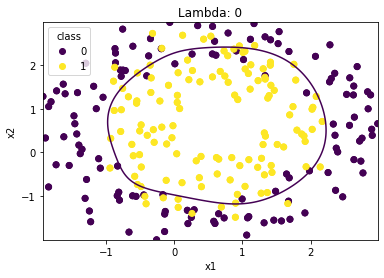

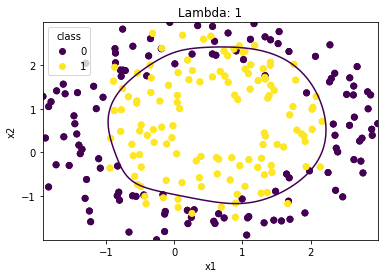

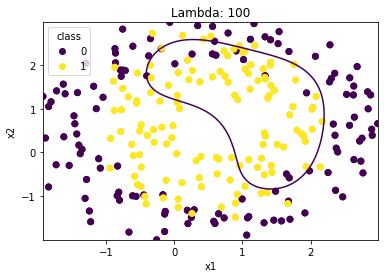

C:\Users\gandi\AppData\Local\Temp\ipykernel_45664\1163830579.py:53: UserWarning: No contour levels were found within the data range.
  plt.contour(x_grid, y_grid, p, levels = [.5])


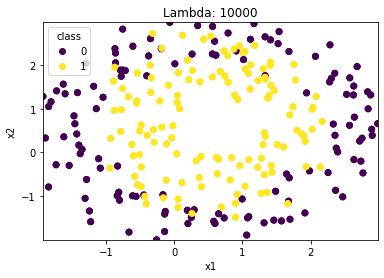

In [5]:
# lambda = 0
lam_0 = logistic_regression_regularized(data, 0)
plt.title("Lambda: 0")
plot(lam_0)
# lambda = 1
lam_1 = logistic_regression_regularized(data, 1)
plt.title("Lambda: 1")
plot(lam_1)
# lambda = 100
lam_100 = logistic_regression_regularized(data, 100)
plt.title("Lambda: 100")
plot(lam_100)
# lambda = 10000
lam_10000 = logistic_regression_regularized(data, 10000)
plt.title("Lambda: 10000")
plot(lam_10000)


Answer for part (d) here: 
As the value of lambda increases, we notice that the decision boundary seems to tighten up and become less accurate as well. There are many more false classifications as 1 instead due to the weights not being changed significantly at the higher lambda values. The lower lambda values seem to be a better fit as the weights adjust properly at each cycle whereas the model is underfit at the high lambdas.
